# Introduction to TDA methodologies

*Disclaimer*: some images shown here are taken part from the *TOPdata* lecture slides, part from some tutorials I found while studying the topic; for these images I do not take credit.

Topological Data Analysis generally aims at extracting topological features from a Point Cloud Data (PCD) set.
This is based on the assumption that a point cloud in $\mathbb R^d$ or in a general metric space could be endowed with a *shape*, which consequently can be described using topological features.
This shape can be characterized by properly constructing a **complex** connecting togheter close points (in terms of distances) through **simplices**.

### Simplex

<img src="imgs/simplices.png" width="500px" align="center" alt="aux">

A geometric simplex is a generalization of the notion of a triangle or tetrahedron to arbitrary dimensions.
The simplex is so-named because it represents the simplest possible polytope in any given space.

A **k-simplex** is then a k-dimensional polytope which is the convex hull of its k + 1 vertices.

For example,
* 0-simplex is a point,
* 1-simplex is a line segment,
* 2-simplex is a triangle,
* 3-simplex is a tetrahedron,
* ...

### Simplicial complex

<img src="imgs/simplicial_complex.png" width="200px" align="center" alt="aux">

A (geometric) **simplicial complex** $\mathcal K$ in $\mathbb R^d$ is a collection of simplices in $\mathbb R^d$ such that
* every face of a simplex of $\mathcal K$ is in $\mathcal K$,
* the non-empty intersection of any two simplices of $\mathcal K$ is a face of each of them

Given a simplicial complex $\mathcal K$ in $\mathbb R^d$, its **dimension**, denoted as $dim(\mathcal K)$ is the supremum of the dimensions of the simplices of $\mathcal K$.
For instance, a simplicial 2-complex must contain at least one triangle, and must not contain any tetrahedra or higher-dimensional simplices; in the example figure it is represented a *3-complex*.

## From data to complexes

In literature there exist a number of possible choices of simplicial complexes constructions (most of them based on the notion of *nerve complex*),
* Delaunay triangulations (Voronoi diagrams)
* Cech complexes
* Vietoris-Rips complexes
* Alpha-shapes
* Witness complexes

Given a *finite* point cloud in $\mathbb R^d$, these choices depend on the specific problem one is facing, since they differ from the category of the "output" complex (geometric or abstract), the dimension, and the dependece on some parameters.

### Nerve complex

<img src="imgs/nerve_complex.png" width="400px" align="center" alt="aux">

Given a finite collection of $S$ sets in $\mathbb R^d$, the **nerve $Nrv(S)$** is the *abstract* simplicial complex generated by the non-empty common intersections.
This construction is important because it was proved that if $S$ is a finite collection of convex sets in $\mathbb R^d$, then the $Nrv(S)$ and the union of the sets in $S$ are *homotopy equivalent*, which mean that they have also the same homology.
The "Nerve Theorem" was also generalized by losing the convexity and requesting that all non-empty common intersection are contractible (that can be continuously shrunk to a point).

### Vietoris-Rips complex

<img src="imgs/vr_complex.png" width="300px" align="center" alt="aux">

The [Vietoris-Rips (VR) complex](https://en.wikipedia.org/wiki/Vietoris%E2%80%93Rips_complex) of a generic point cloud distribution in $\mathbb R^d$ is an [abstract simplicial complex](https://en.wikipedia.org/wiki/Abstract_simplicial_complex) that can be defined  by forming a simplex for every finite subset of points that has diameter at most $\sigma$ (or radius $r$).

<img src="imgs/vr_c_1.png" width="150px" align="center" alt="aux">

A VR complex can be defined for any metric space given the notion of a distance function $d(\cdot, \cdot)$.

The computation of a VR complex requires a finite points in $\mathbb R^d$ (or alternatively their distance matrix, which carries the same meaning).
Then, to efficiently compute it, a two-step approach is adopted by most programs:

1. skeleton computation,
2. Vietoris-Rips expansion.

Building the *skeleton* means building a topological graph with as many vertices as there are points, and as edges only pairs of points (vertices) whose distance is smaller than or equal to $\sigma$.
Then, the skeleton is "expanded" to form the VR-complex, for a given value of $\sigma$.

<img src="imgs/vr_c_0.png" width="300px" align="center" alt="aux">

## Homology and persistent pairs

!!!TODO improve this shit ???

*Homology* it is a topological invariant that can be used to describe and characterize algebraic objects.
In our case, given a (finite) simplicial complex $\mathcal K$, the *k-homology group* $H_k(\mathcal K)$ it is defined as

\begin{equation}
H_k(\mathcal K) = Z_k(\mathcal K) / B_k(\mathcal K)
\end{equation}

where $Z_k(\mathcal K)$ is the group of *k-cycles* ok $\mathcal K$ and $B_k(\mathcal K)$ is the group of *k-boundaries* of $\mathcal K$.
The theorem of structure for finitely generated Abelian groups ensures us that each homology group can be expressed with a series of coefficients: $\beta_k$ the k-th Betti number, $\{ \lambda_i \}$ torsion coefficients, and the homology generators of $\mathcal K$.
Given some conditions, it was demostrated that the Betti numbers of $\mathcal K$ **completely characterize** the homology groups of $\mathcal K$.

### Persistent pairs

!!!TODO improve this shit ???

The shape of an object can be described by considering the persistent homology of the generic filtration $K_i$, where the index $i$ represent the filtraton step.
A filtration represent an indexed family $\{S_i\}$ of subobjects of a given algebraic structure that follow the general rule, for $i,j \in \mathcal I$, where $\mathcal I$ is some totally ordered index set, if $i \leq j$, then $S_i \subset S_j$.

<img src="imgs/filtration.png" width="500px" align="center" alt="aux">

The core information of persistent homology is given by the persistence pairs.
Given the simple filtration shown in figure, $\{ K_i \}$, with $i \in \mathcal I$ and $\mathcal I = (0,1,2,3,\dots)$, a persistence pair $(p, q)$ is an element in $\{0, ... , m\} × (\{0, ... ,m\} ∪ \{\infty\})$ such that $p < q$, representing an homological class that is born at step $p$ and dies at step $q$.

<img src="imgs/filtration_ex.png" width="500px" align="center" alt="aux">

Conceptually, persistent homology provides a notion of "shape" less abstract and closer to our everyday perception.
Two shapes can be capared by comparing their homology groups, or equivalentely their persistence pairs.
In order to perform this comparison, we need *visual* and *descriptive representations* for persistence pairs and some forms of *distances* and *stability results*.

## Persistent diagrams and barcodes

Probably the most handy and widely used representation are *barcodes* and *persistence diagrams*.

<img src="imgs/visual_representation.png" width="550px" align="center" alt="aux">

In the **barcode** representation each bar represent a persistent pair, with its birth and death as a linear segment; *essential pairs* $(q,\infty)$ are represented by infinte lenght segments.
In the **persistence diagrams** representation, segments are represente as points in a $(birth,death)$ plane in $\mathbb R^2$.
Intuitively the longer is an interval in the barcode or, equivalently the farther from the diagonal is the corresponding point in the diagram, the more persistent, and thus relevant, is the corresponding homological feature across the filtration.

Below it is depicted a visual example on how the algorithm works (this image was taken by a Ghudi tutorial)

<img src="imgs/persistence.png" width="600px" align="center" alt="aux">

a) For the radius r = 0, the union of balls is reduced to the initial finite set of point, each of them corresponding to a 0-dimensional feature, i.e. a connected component; an interval is created for the birth for each of these features at r = 0.  

b) Some of the balls started to overlap resulting in the death of some connected components that get merged together; the persistence diagram keeps track of these deaths, putting an end point to the corresponding intervals as they disappear.    

c) New components have merged giving rise to a single connected component and, so, all the intervals associated to a 0-dimensional feature have been ended, except the one corresponding to the remaining components; two new 1-dimensional features, have appeared resulting in two new intervals (in blue) starting at their birth scale.  

d) One of the two 1-dimensional cycles has been filled, resulting in its death in the filtration and the end of the corresponding blue interval.

## Examples of PCDs

In [1]:
import numpy as np
import sys

import gudhi as gd
import gudhi.representations

sys.path.append('../')
from tools import plot_tools as myplt
from tools import topo_tools as mytop

import matplotlib.pyplot as plt

In [2]:
# Load the data sets and store them in a dict()

path_file = '../datasets/samplePCD/'

files_list = [
    'data_00.txt', 
    'data_01.txt', 
    'data_02.txt', 
    'data_03.txt', 
    'data_04.txt'
]

dataSet = {
    'data_'+str(i): np.loadtxt(path_file+file, skiprows=1) for i,file in enumerate(files_list)
}

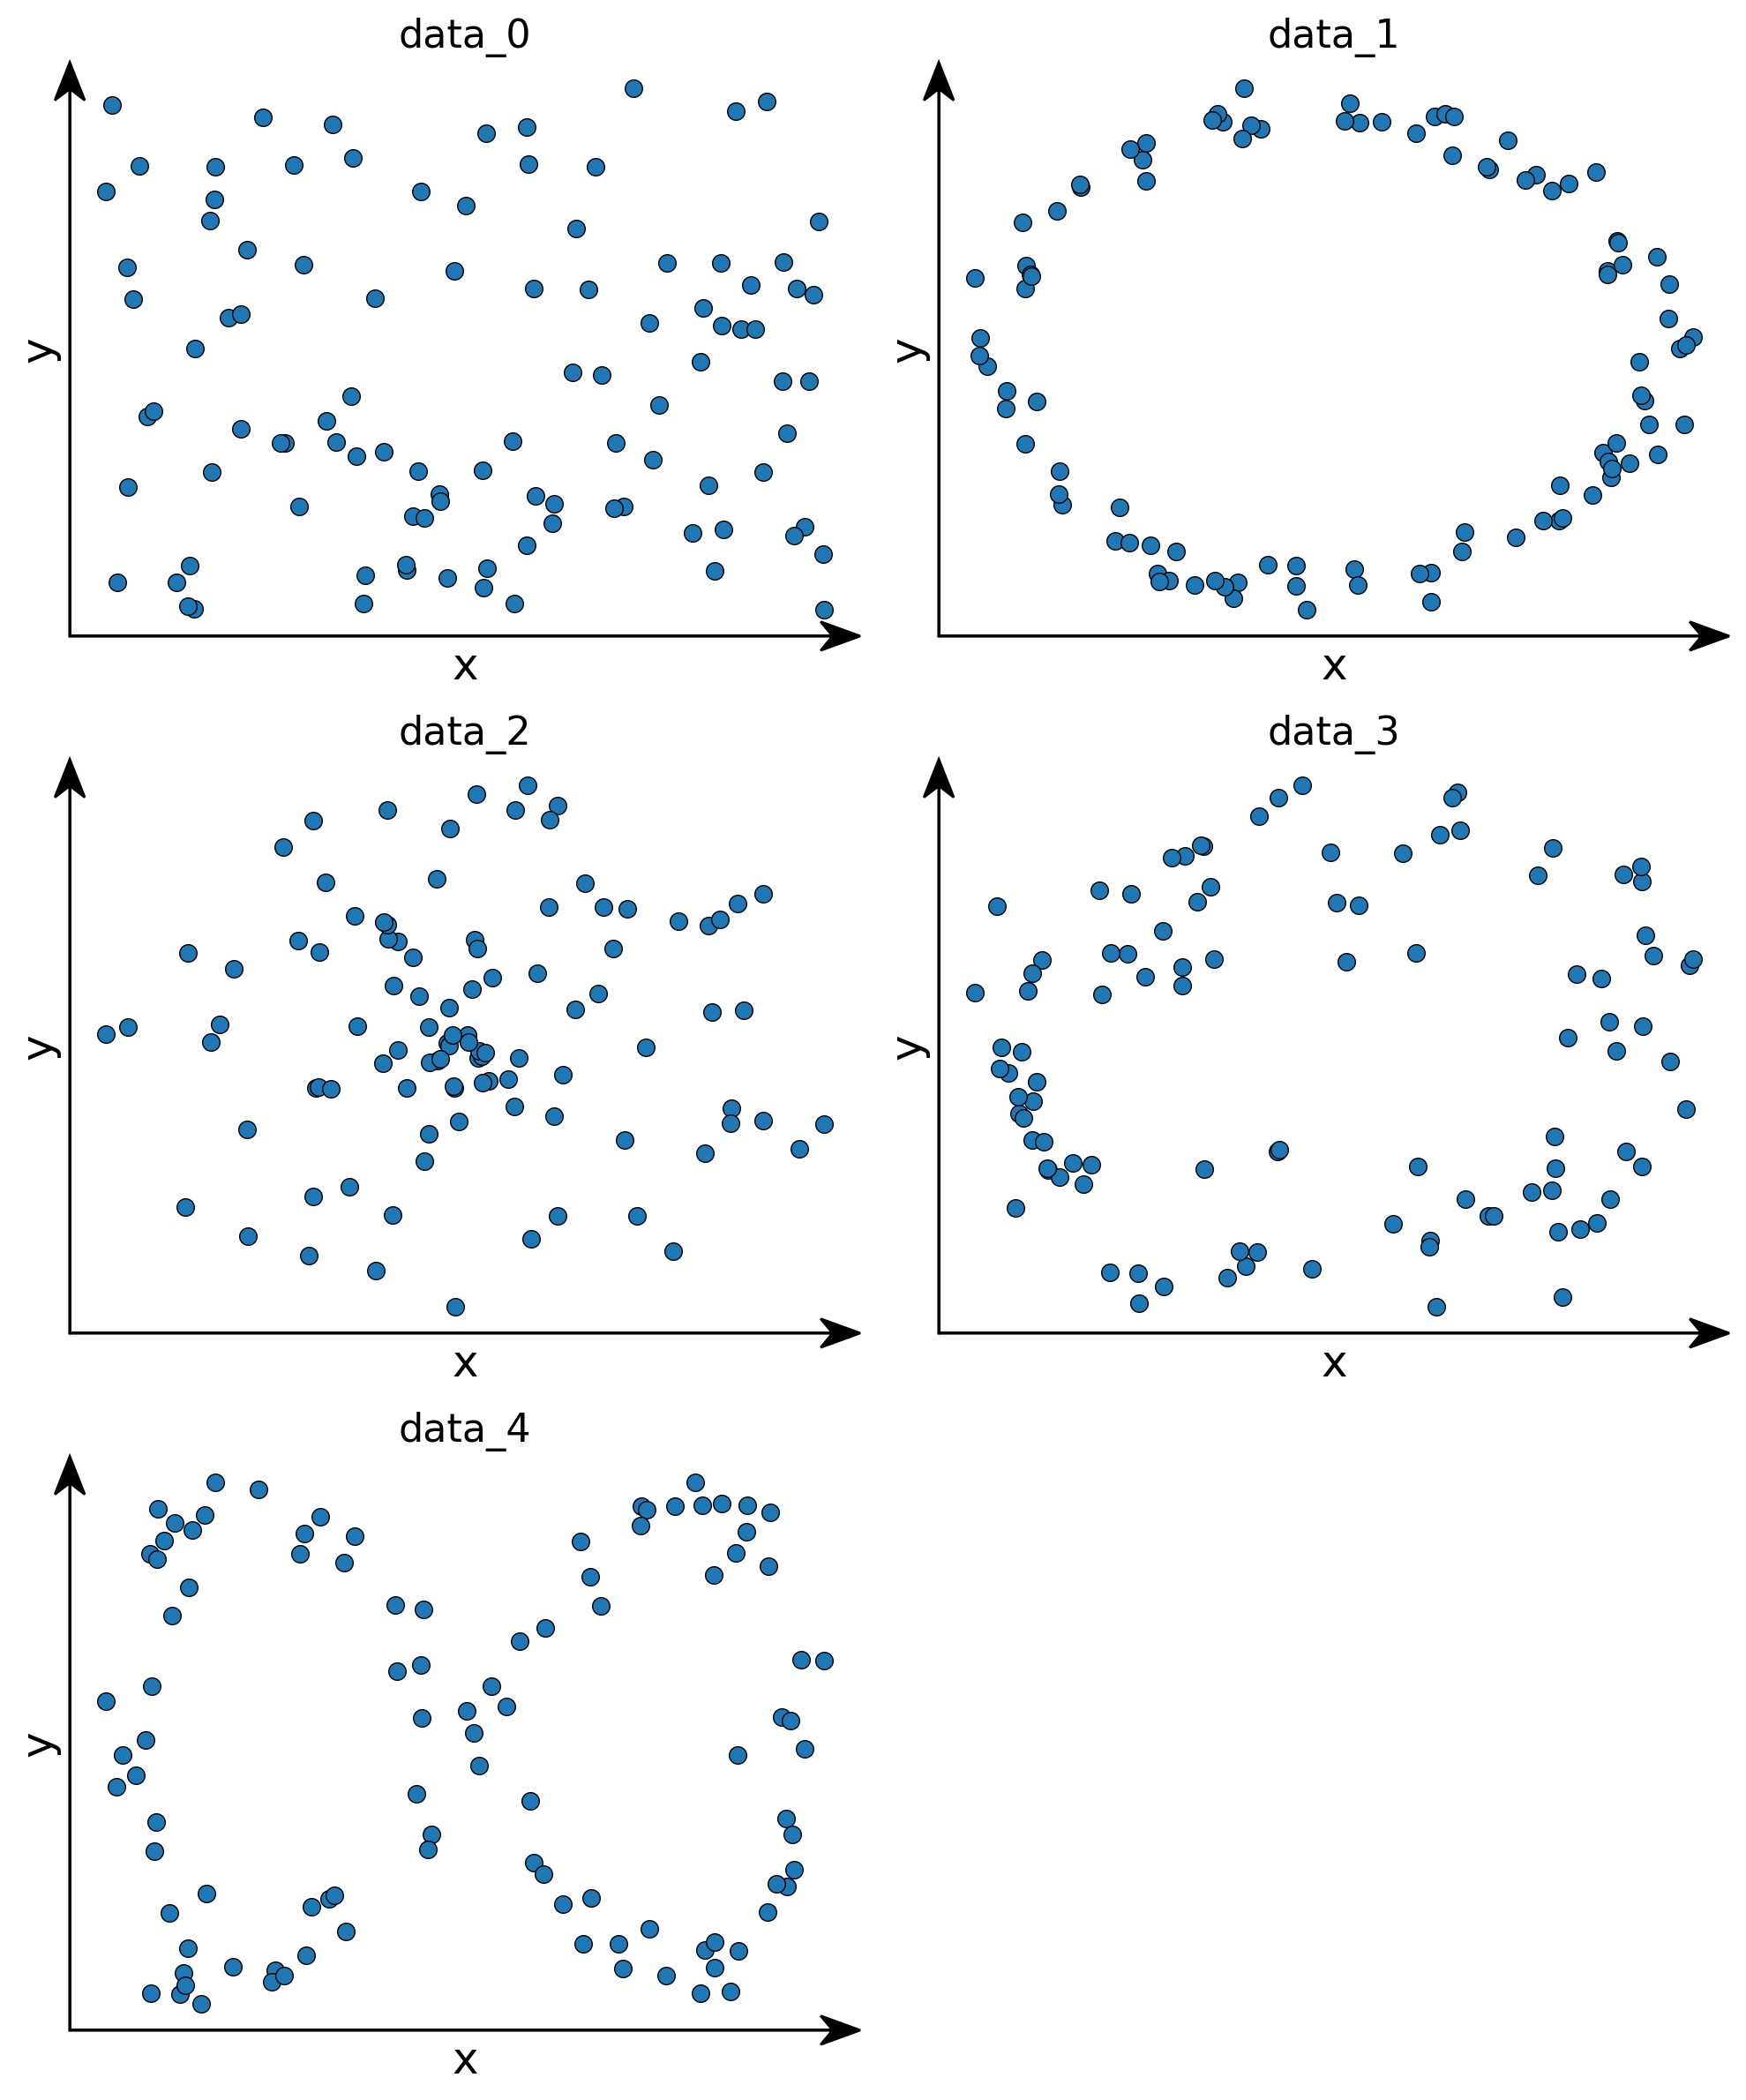

In [3]:
# Plot data sets

fig, ax = myplt.get_axes(len(files_list), max_col=2, res=200)
for i,j in enumerate(dataSet):
    myplt.single_scatter_axe(dataSet[j], ax[i], s=50)
    myplt.axarrows(fig,ax[i],labels=['x','y'])
    ax[i].set_title(r''+j, size=16)
#     ax[i].set_aspect('equal')
fig.tight_layout()

### Computing VR complexes and their persistence pairs

In [4]:
# skeleton graph

MEL = 1.0
skeletons = {
    'sk_'+str(i): mytop.get_skeleton(dataSet[dset],MEL) for i,dset in enumerate(dataSet)
}

In [5]:
# VR complex

MAX_DIM = 2
VRcomplexes = {
    'VR_'+str(i): mytop.get_VRcomplex(skeletons[sk],MAX_DIM) for i,sk in enumerate(skeletons)
}

In [6]:
# Persistence pairs

barCodes = {
    'brcd_'+str(i): mytop.get_barCode(VRcomplexes[vr]) for i,vr in enumerate(VRcomplexes)
}

* Persistence Diagrams

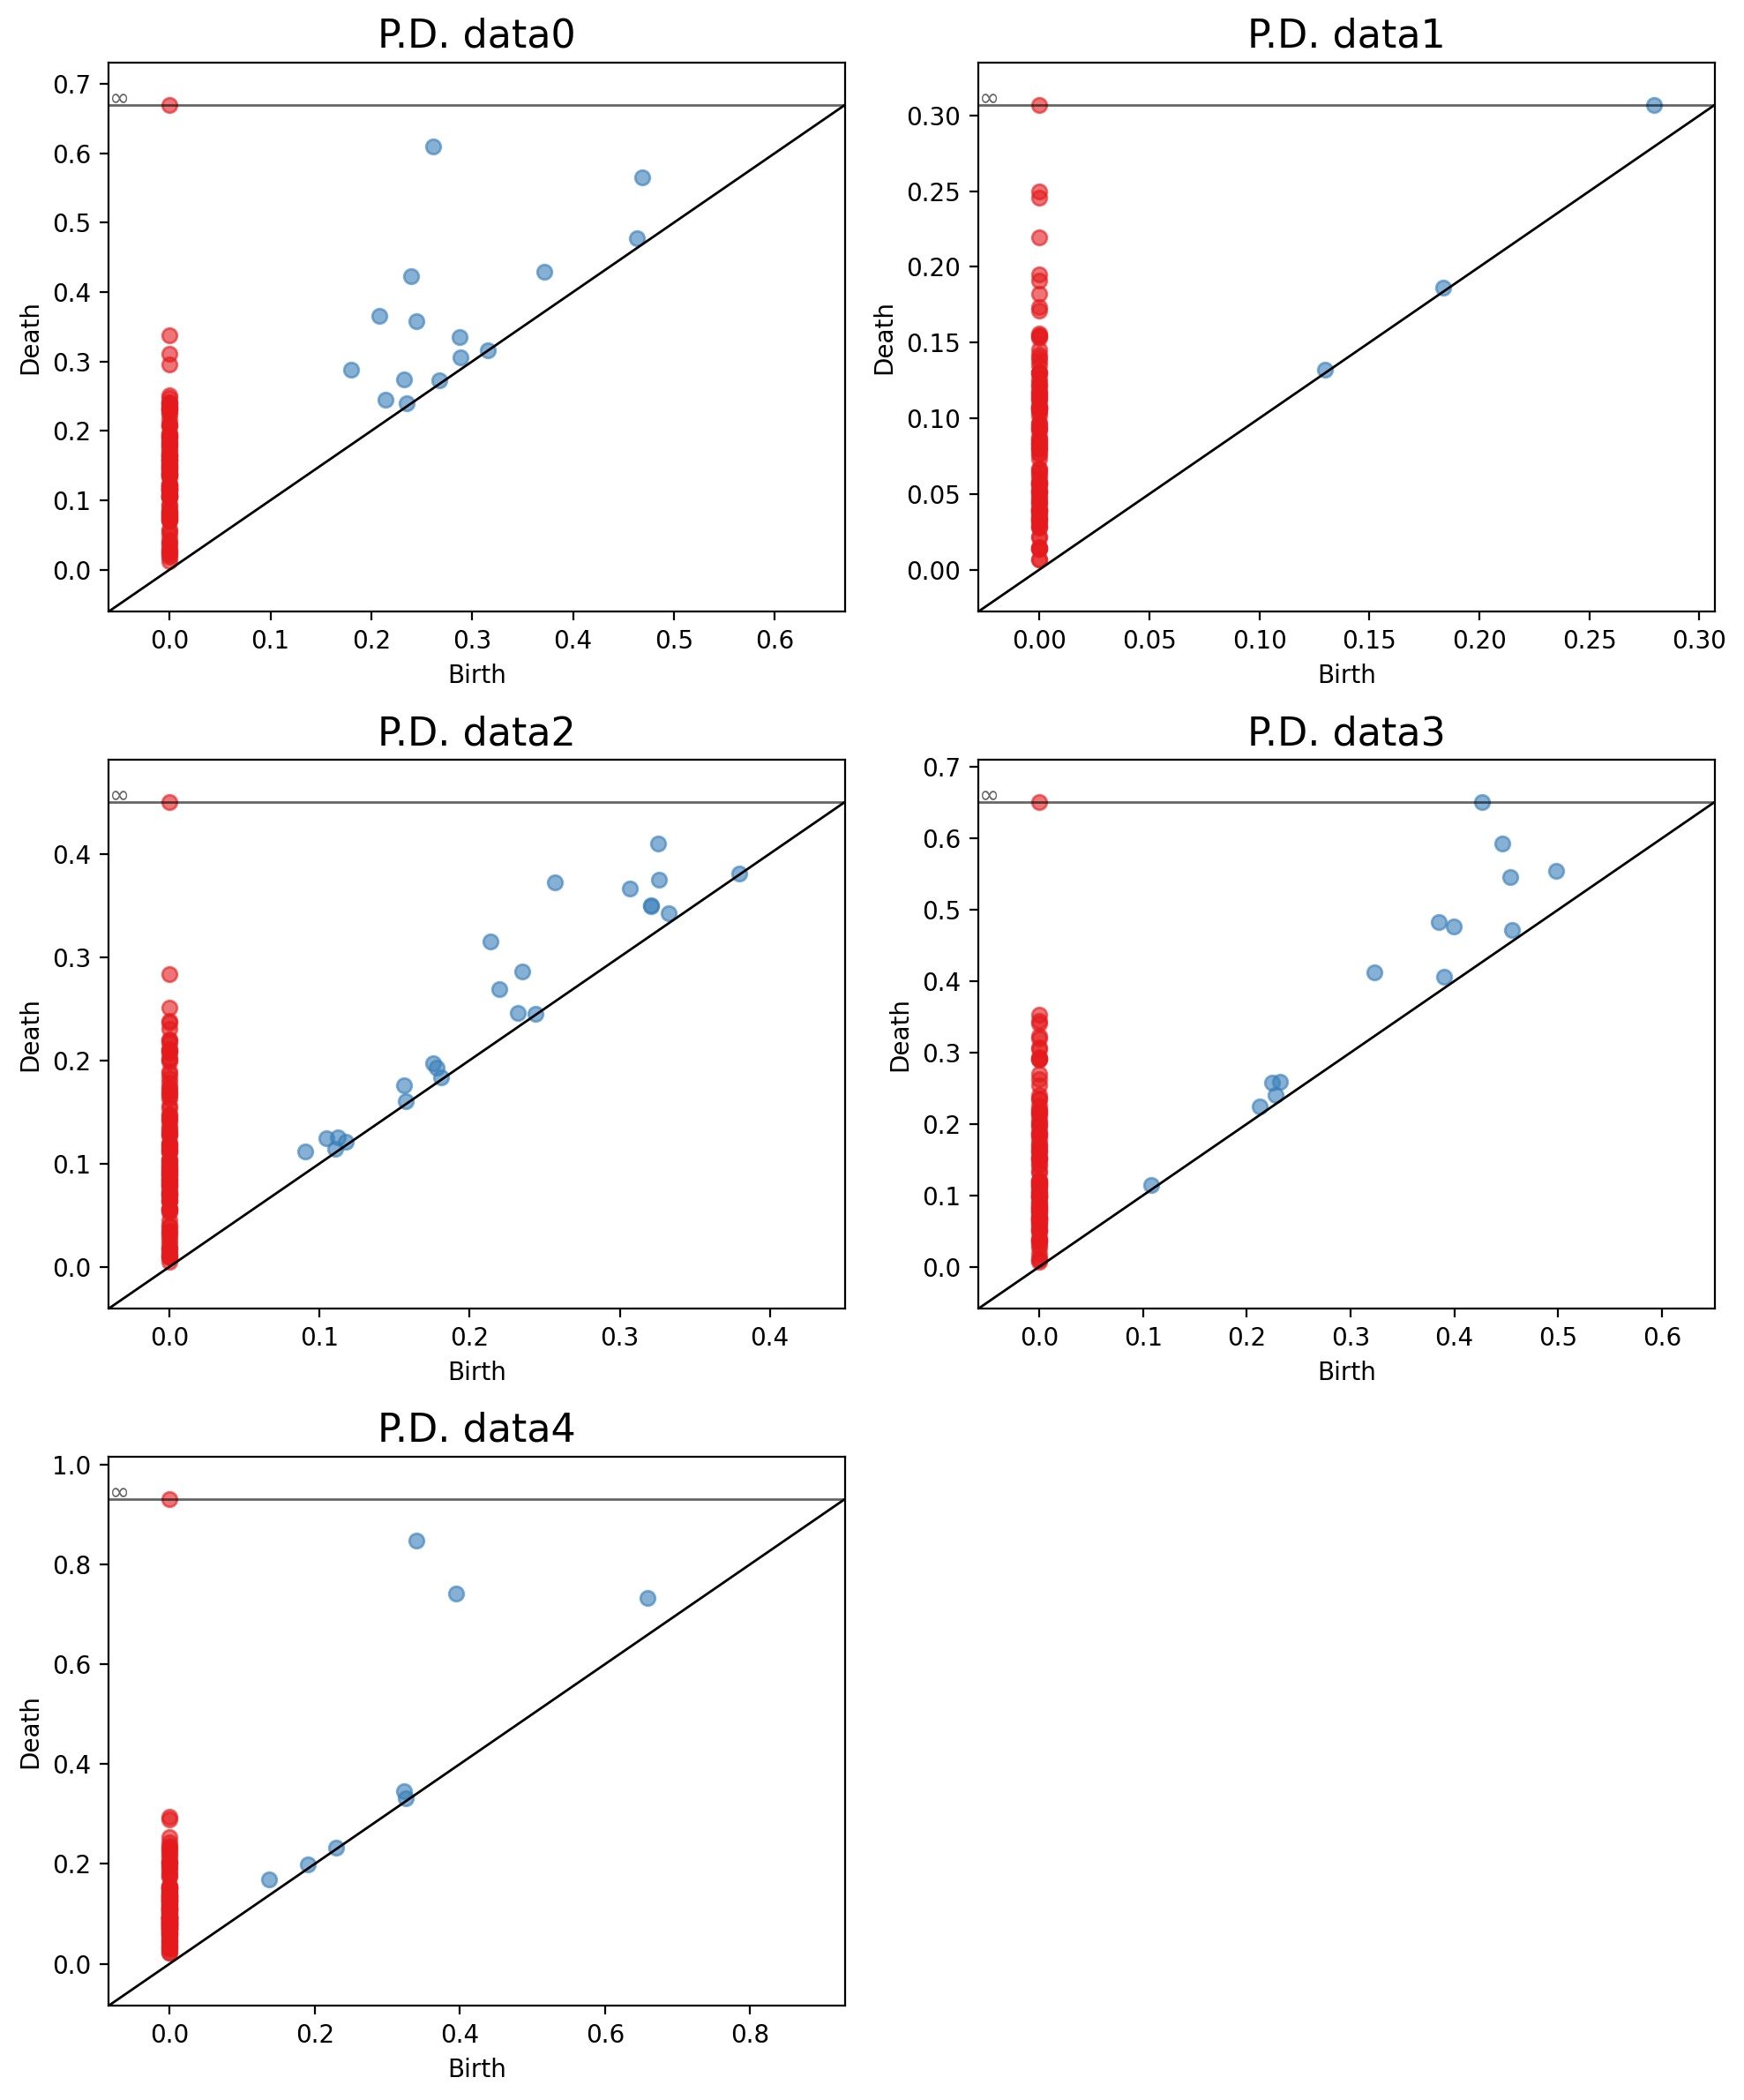

In [7]:
fig, ax = myplt.get_axes(len(files_list), max_col=2, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_diagram(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.D. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

* Peristence Barcodes

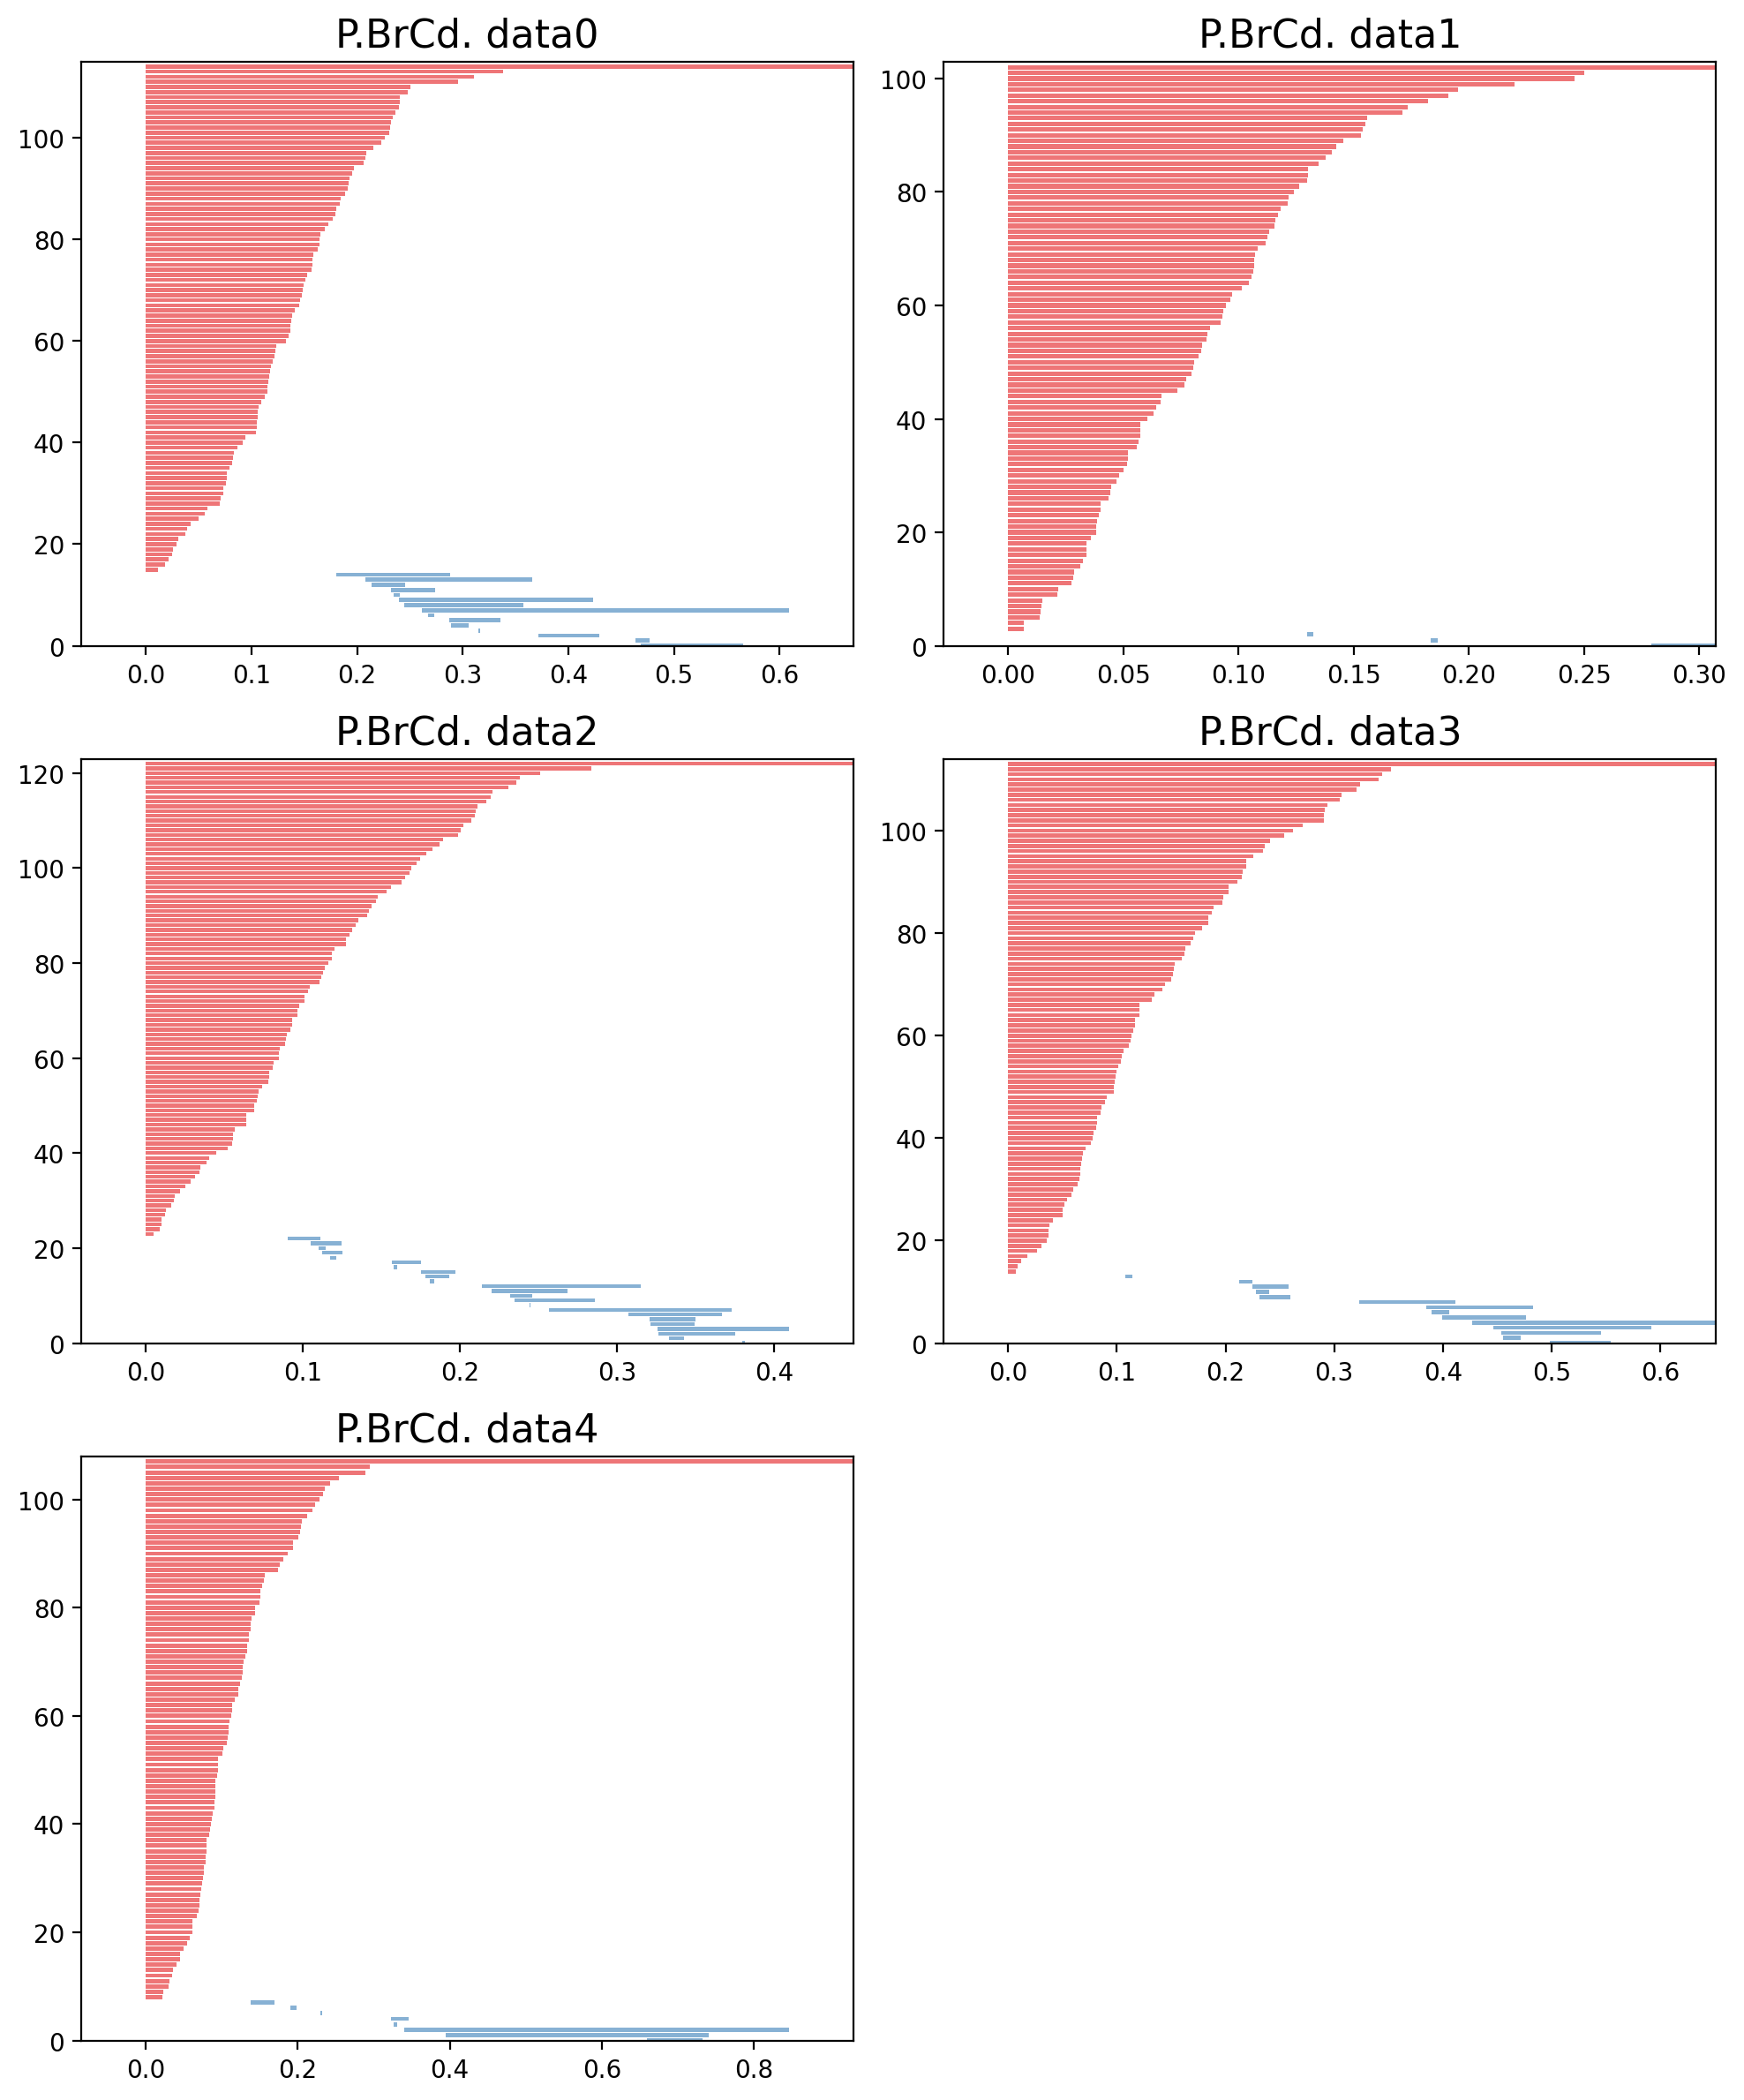

In [8]:
fig, ax = myplt.get_axes(len(files_list), max_col=2, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_barcode(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.BrCd. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

* Persistence Densities (on the Diagrams)

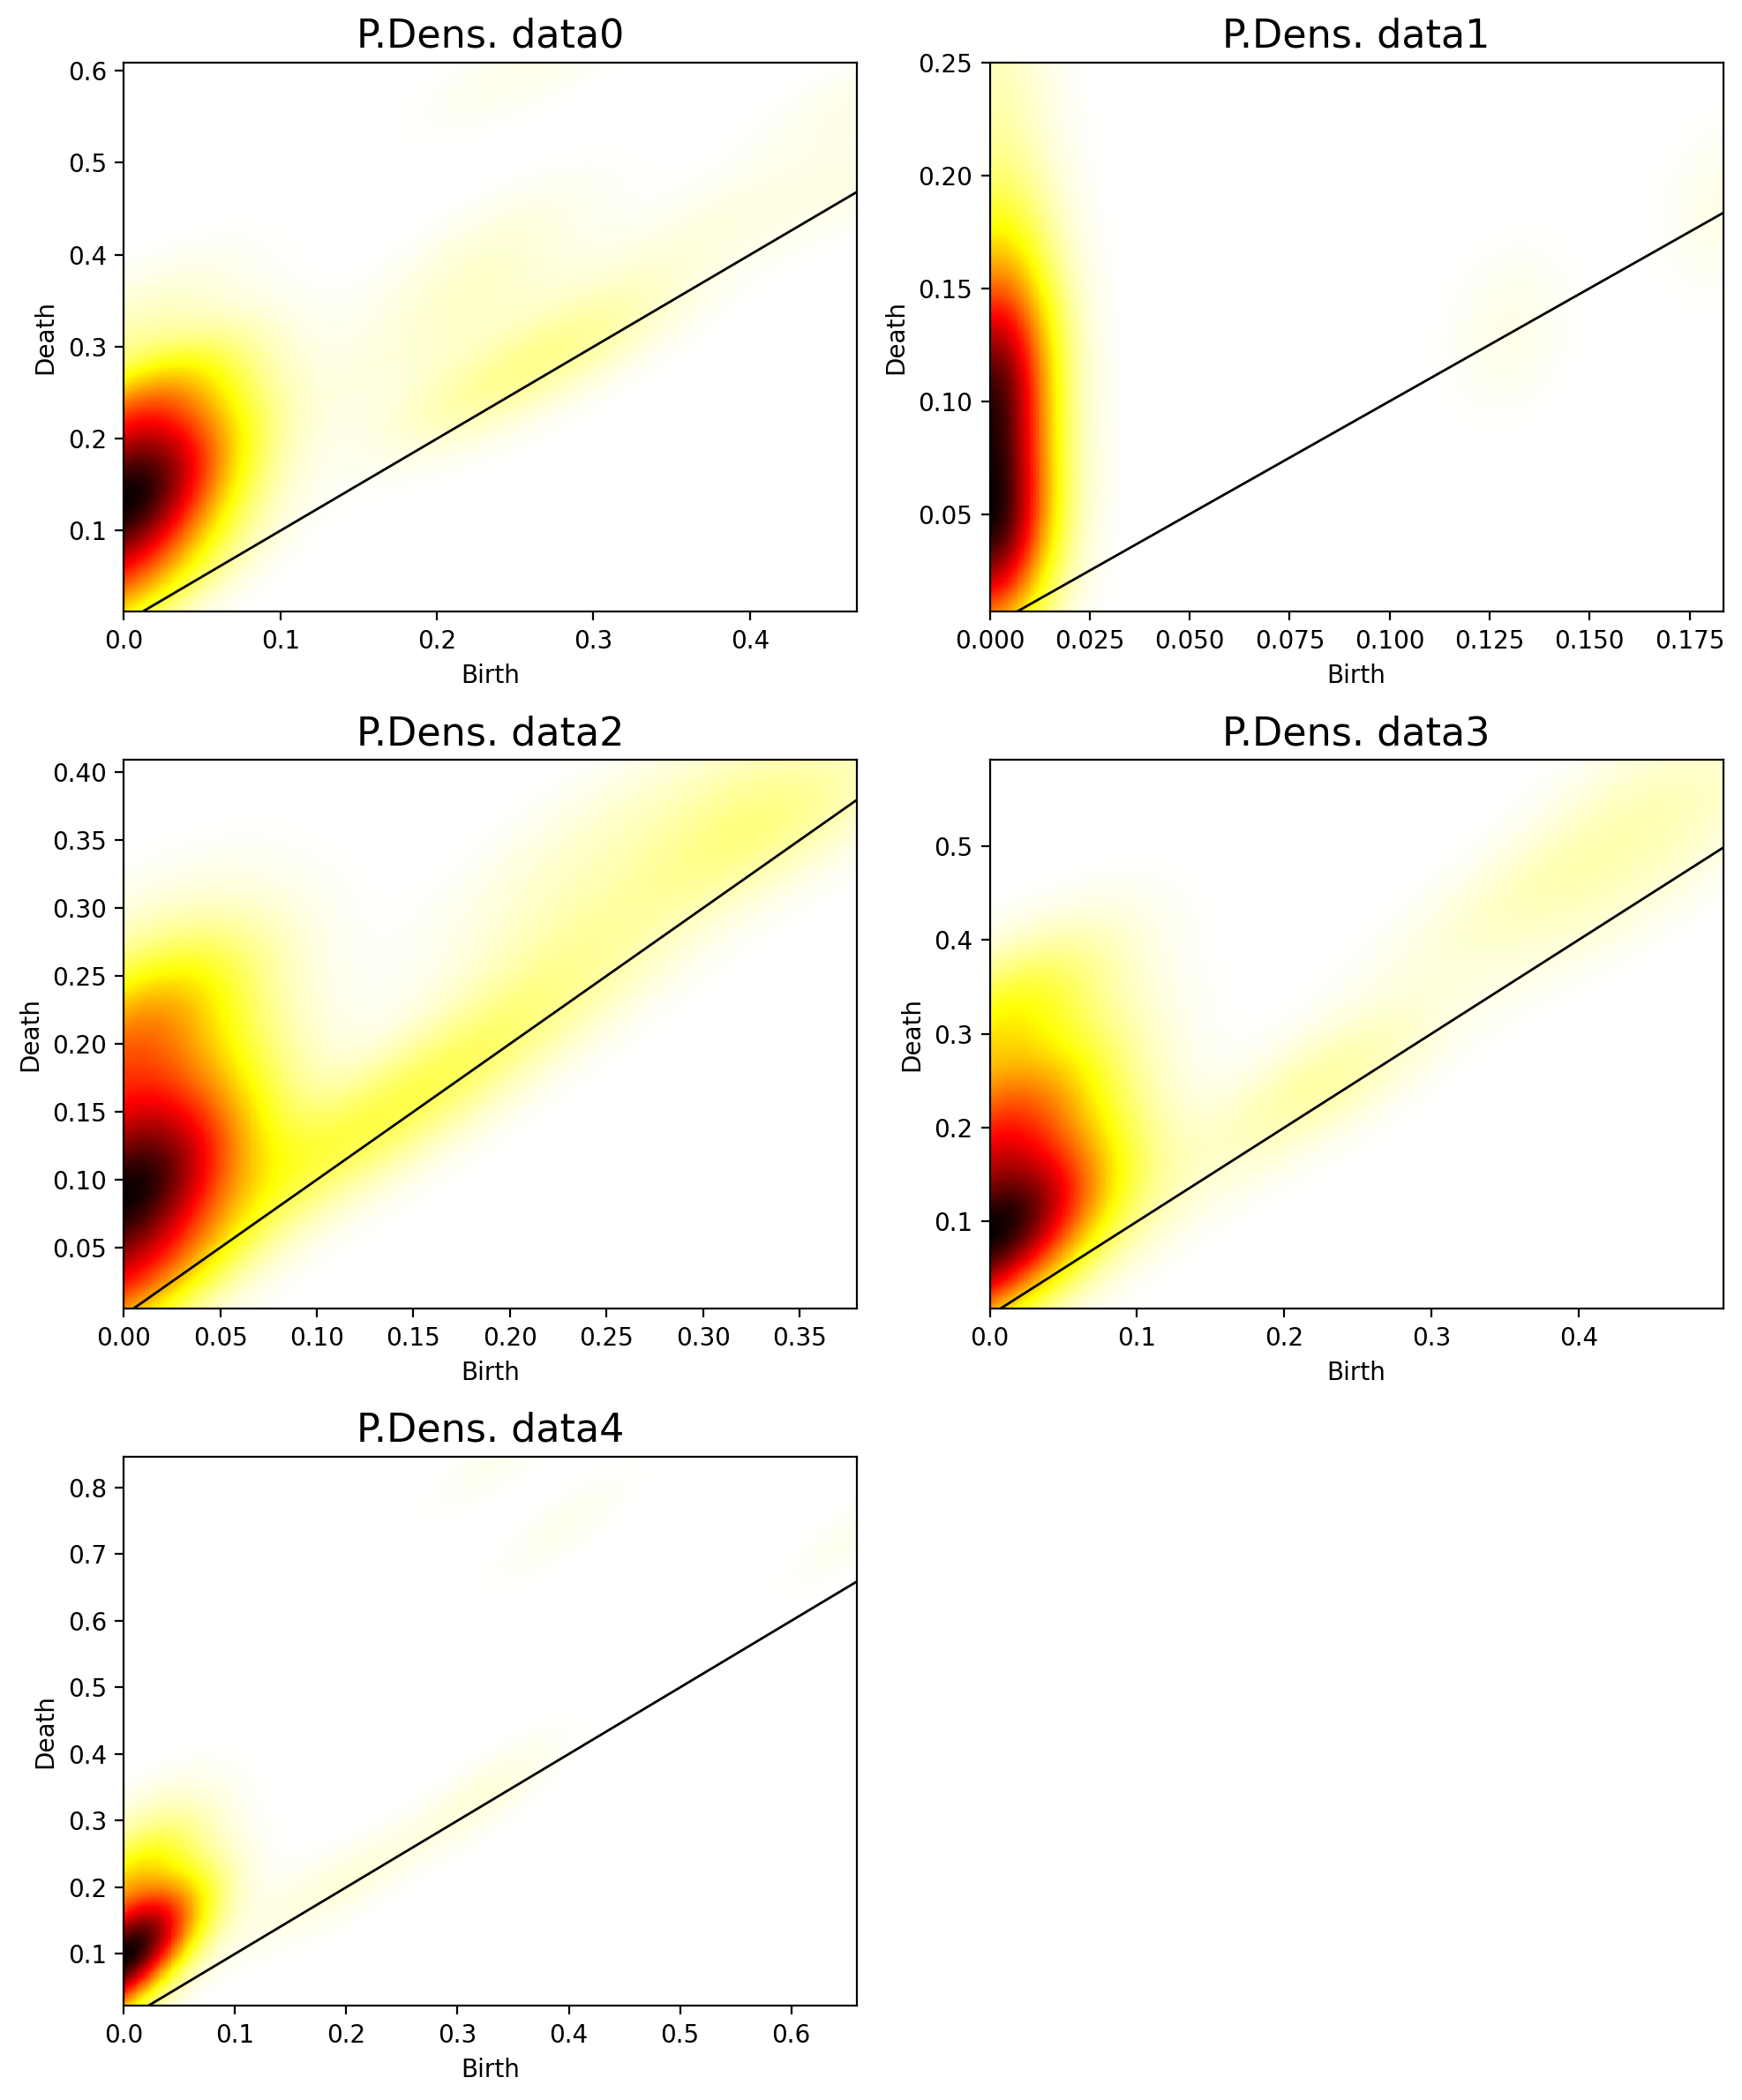

In [9]:
fig, ax = myplt.get_axes(len(files_list), max_col=2, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_density(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.Dens. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

### Visualize the filtrations

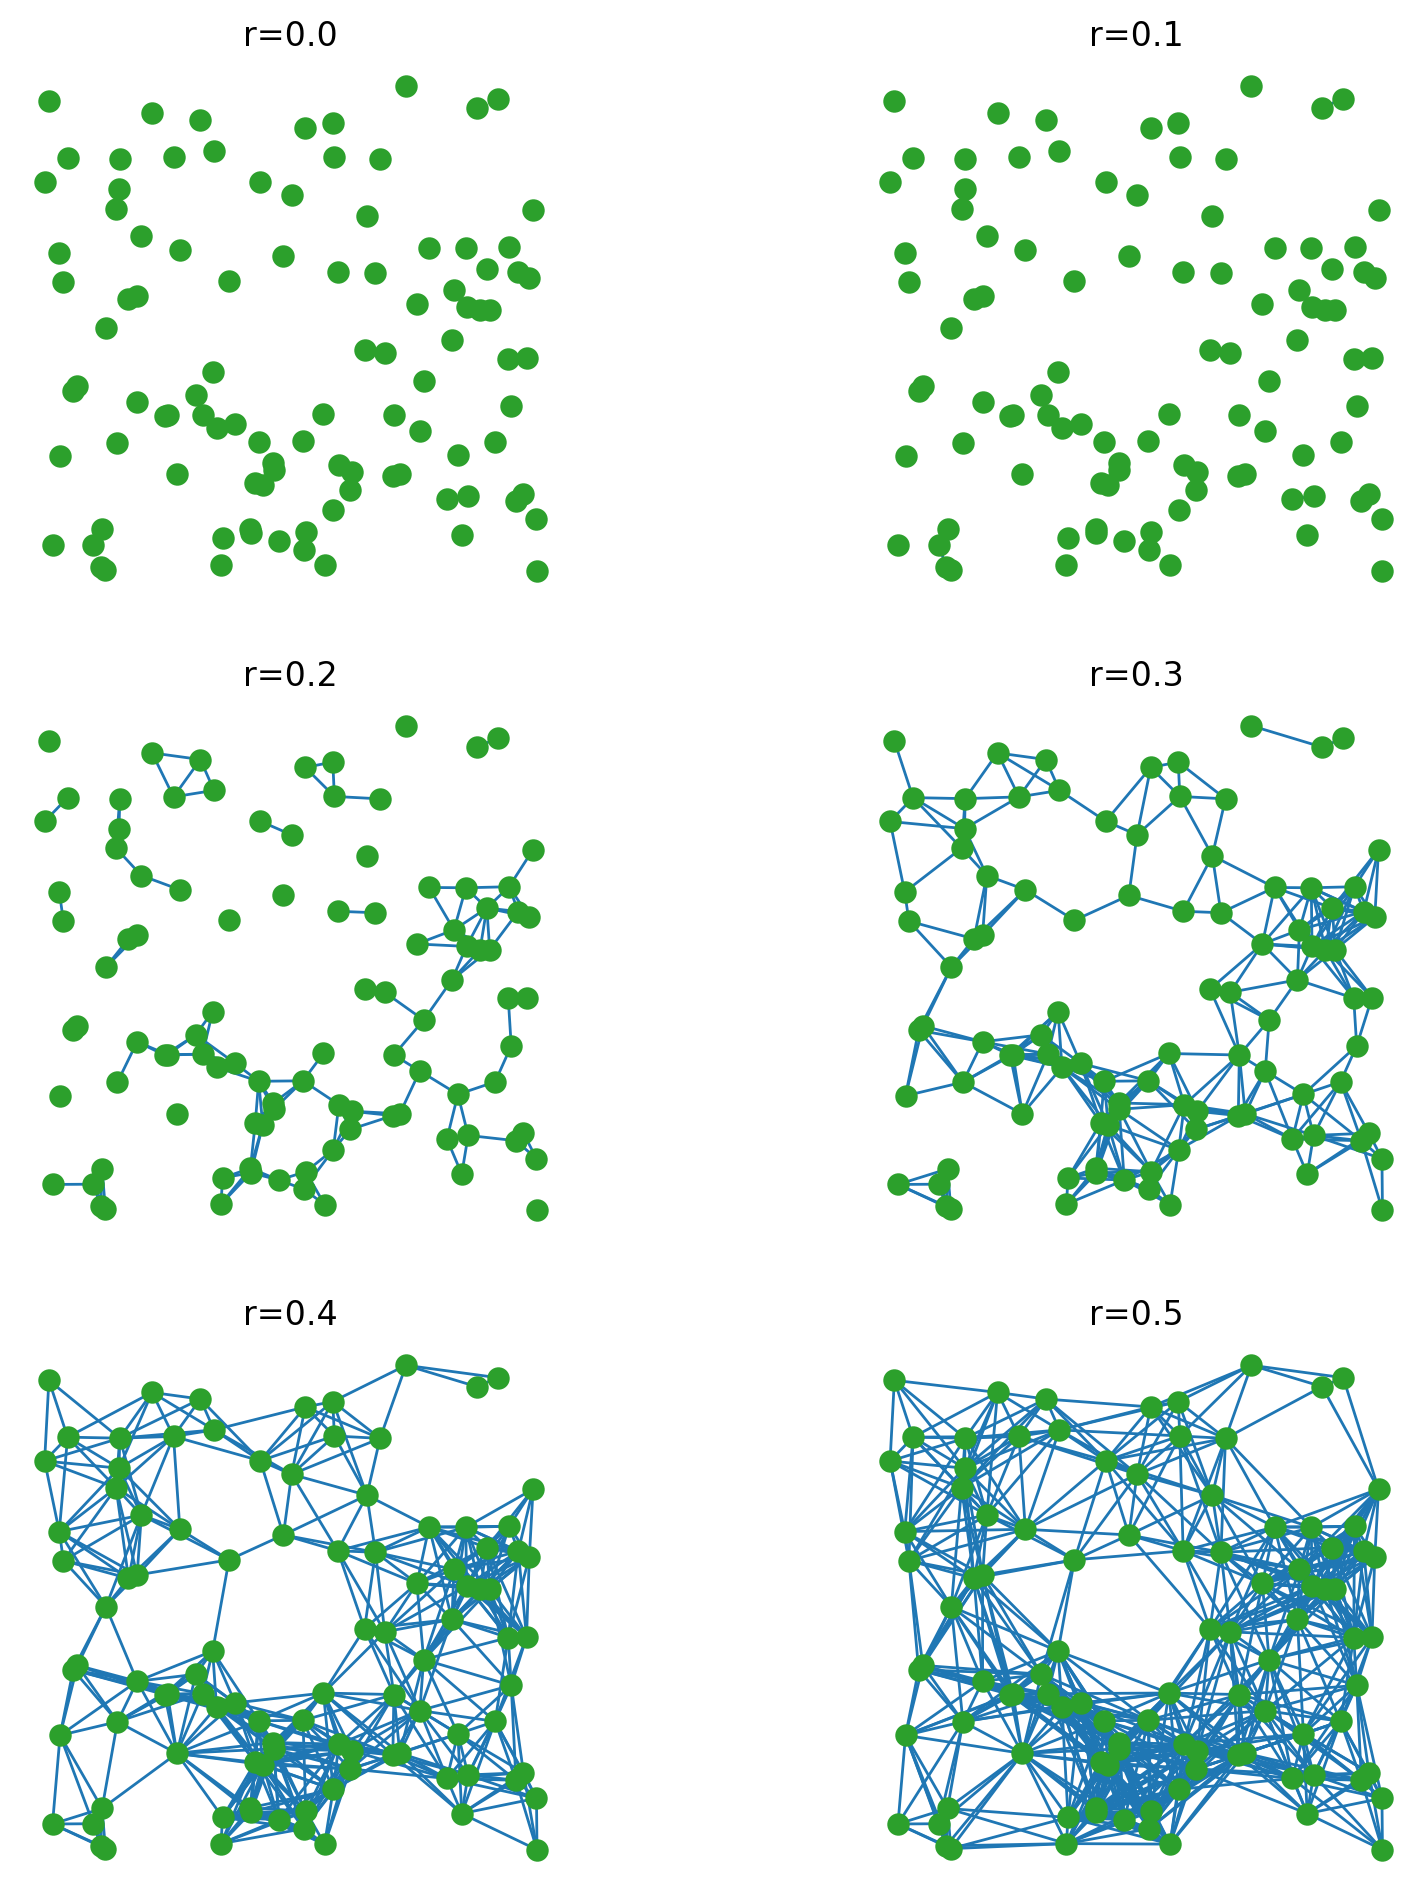

In [10]:
SET = '0'
filtration_cycle = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
fig, ax = myplt.get_axes(len(filtration_cycle), max_col=2, res=200)
for i,fil in enumerate(filtration_cycle):
    filtration = mytop.get_filtration(dataSet['data_'+SET],VRcomplexes['VR_'+SET],r=fil)
    mytop.plt_filtration(dataSet['data_'+SET], filtration, r=fil, axes=ax[i])
    ax[i].set_title(r'r='+str(fil))
    ax[i].set_aspect('equal')

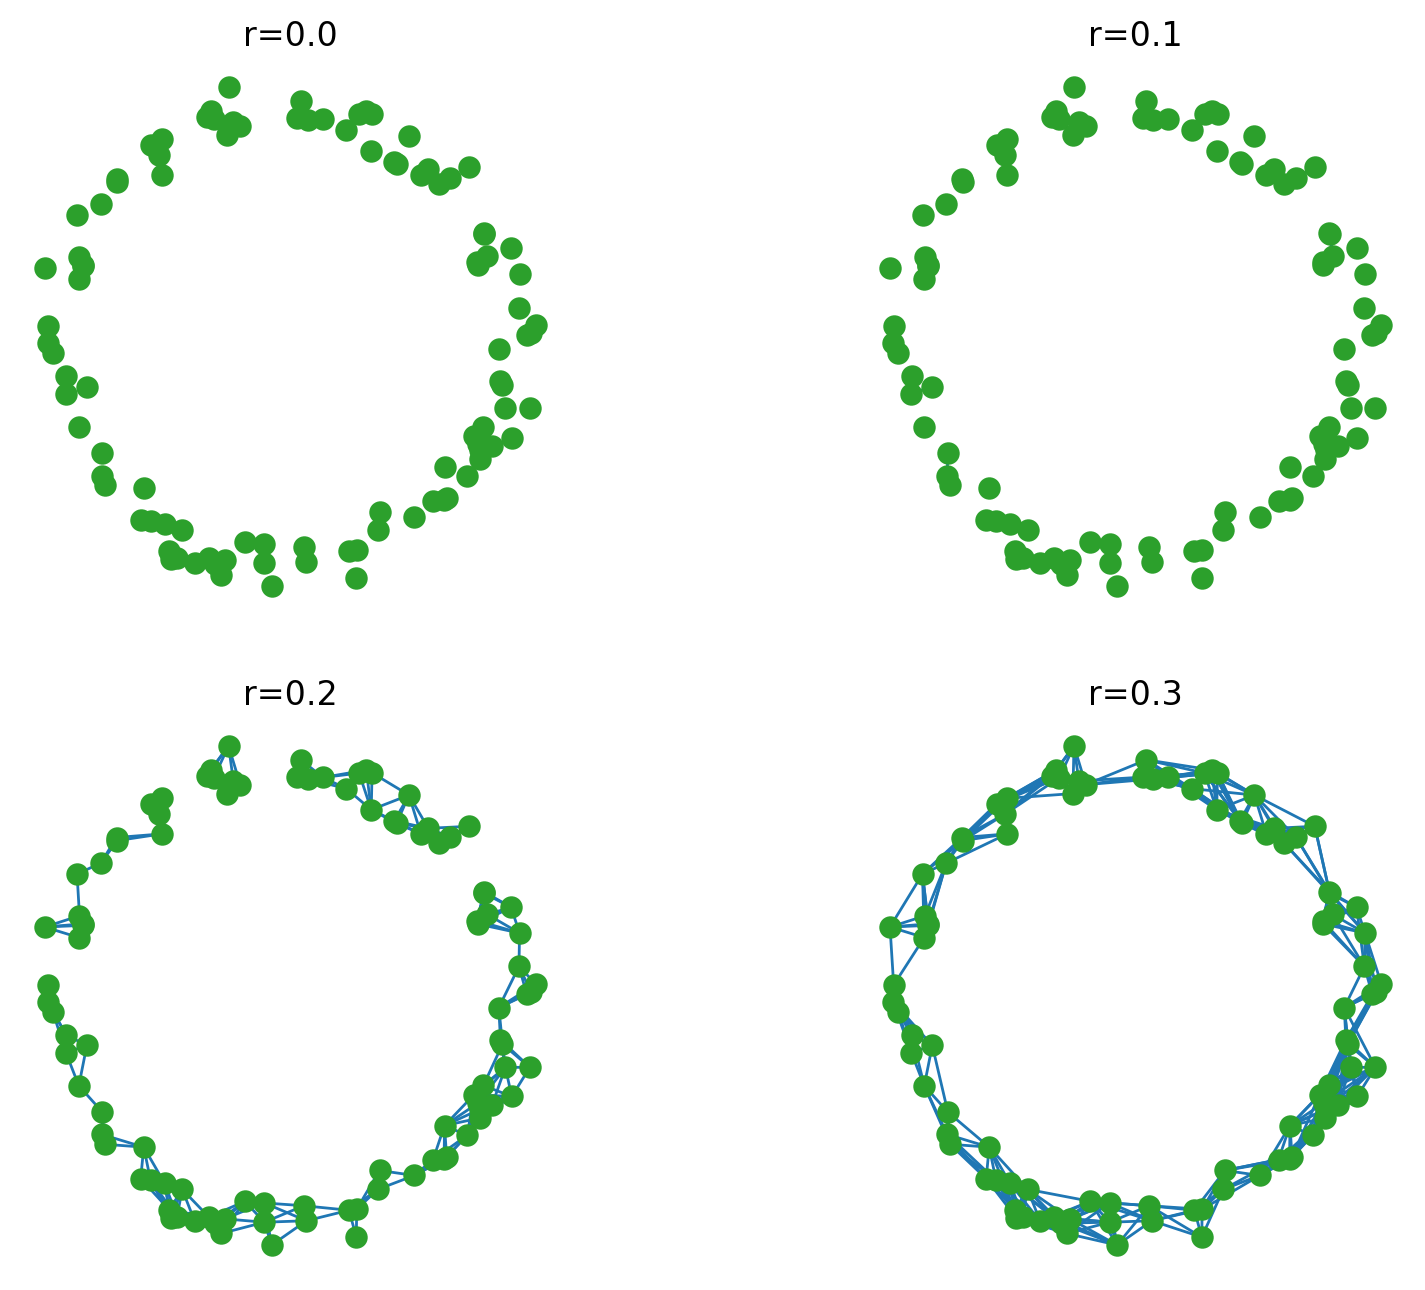

In [11]:
SET = '1'
filtration_cycle = [0.0, 0.1, 0.2, 0.3]
fig, ax = myplt.get_axes(len(filtration_cycle), max_col=2, res=200)
for i,fil in enumerate(filtration_cycle):
    filtration = mytop.get_filtration(dataSet['data_'+SET],VRcomplexes['VR_'+SET],r=fil)
    mytop.plt_filtration(dataSet['data_'+SET], filtration, r=fil, axes=ax[i])
    ax[i].set_title(r'r='+str(fil))
    ax[i].set_aspect('equal')

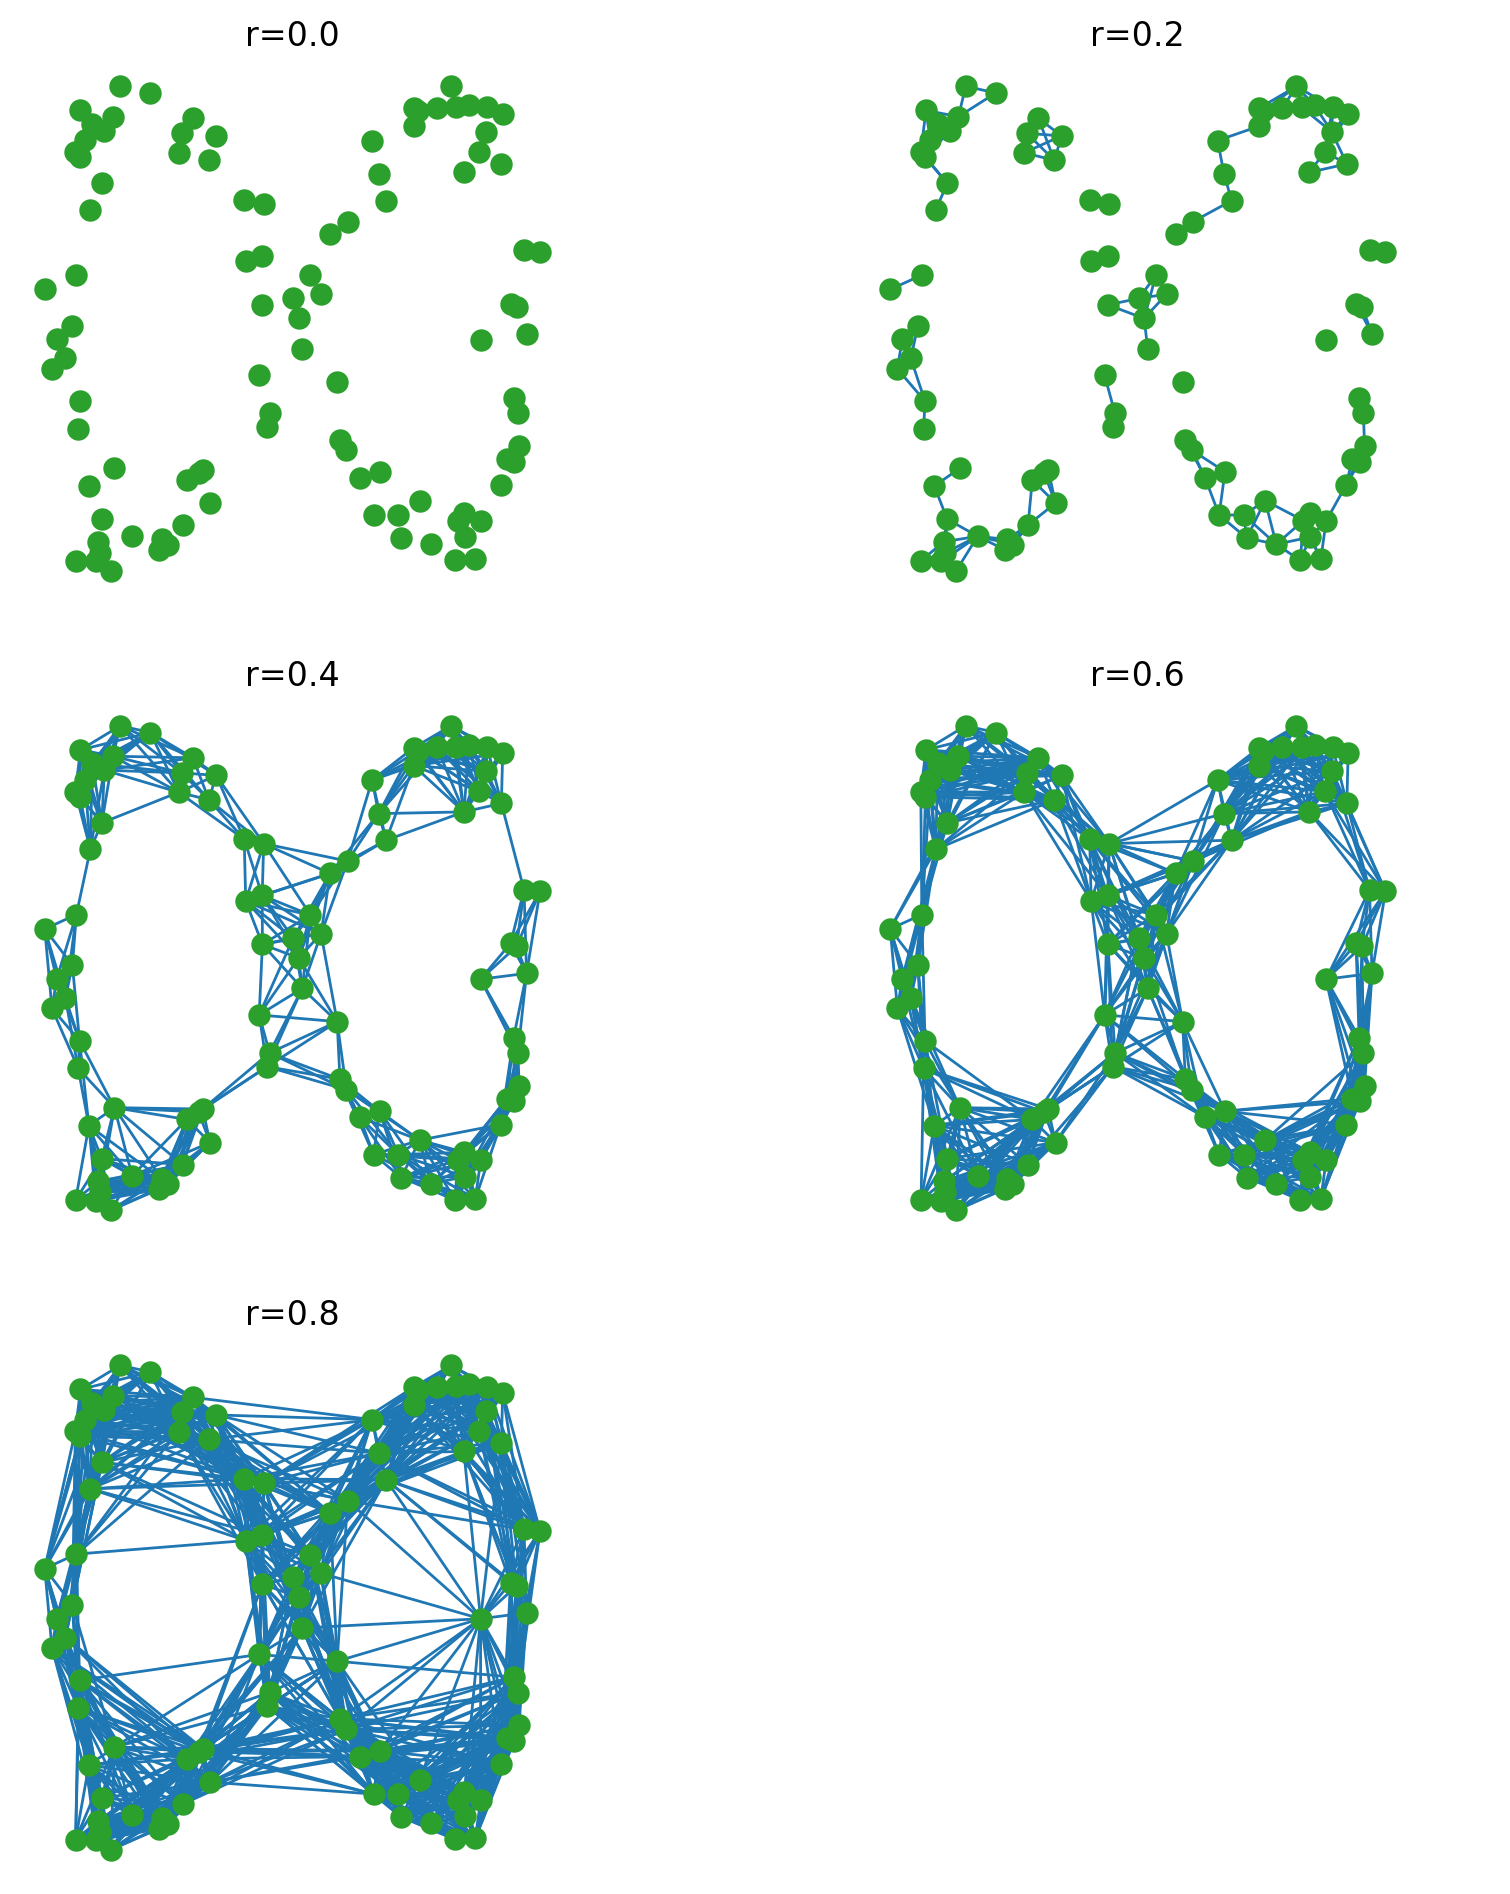

In [12]:
SET = '4'
filtration_cycle = [0.0, 0.2, 0.4, 0.6, 0.8]
fig, ax = myplt.get_axes(len(filtration_cycle), max_col=2, res=200)
for i,fil in enumerate(filtration_cycle):
    filtration = mytop.get_filtration(dataSet['data_'+SET],VRcomplexes['VR_'+SET],r=fil)
    mytop.plt_filtration(dataSet['data_'+SET], filtration, r=fil, axes=ax[i])
    ax[i].set_title(r'r='+str(fil))
    ax[i].set_aspect('equal')

### Landscapes and Silhouette

spiegone

In [36]:
RES = 500
VRc = ['VR_0', 'VR_2', 'VR_4']
newVRcomplexes = {
    'VR_0' : VRcomplexes['VR_0'],
    'VR_2' : VRcomplexes['VR_2'],
    'VR_4' : VRcomplexes['VR_4']
}

In [37]:
landscapes = {
    'ls_'+str(i): mytop.get_landscape(newVRcomplexes[vr], res=RES) for i,vr in enumerate(newVRcomplexes)
}

In [38]:
silhouettes = {
    'ls_'+str(i): mytop.get_silhouette(newVRcomplexes[vr], res=RES) for i,vr in enumerate(newVRcomplexes)
}

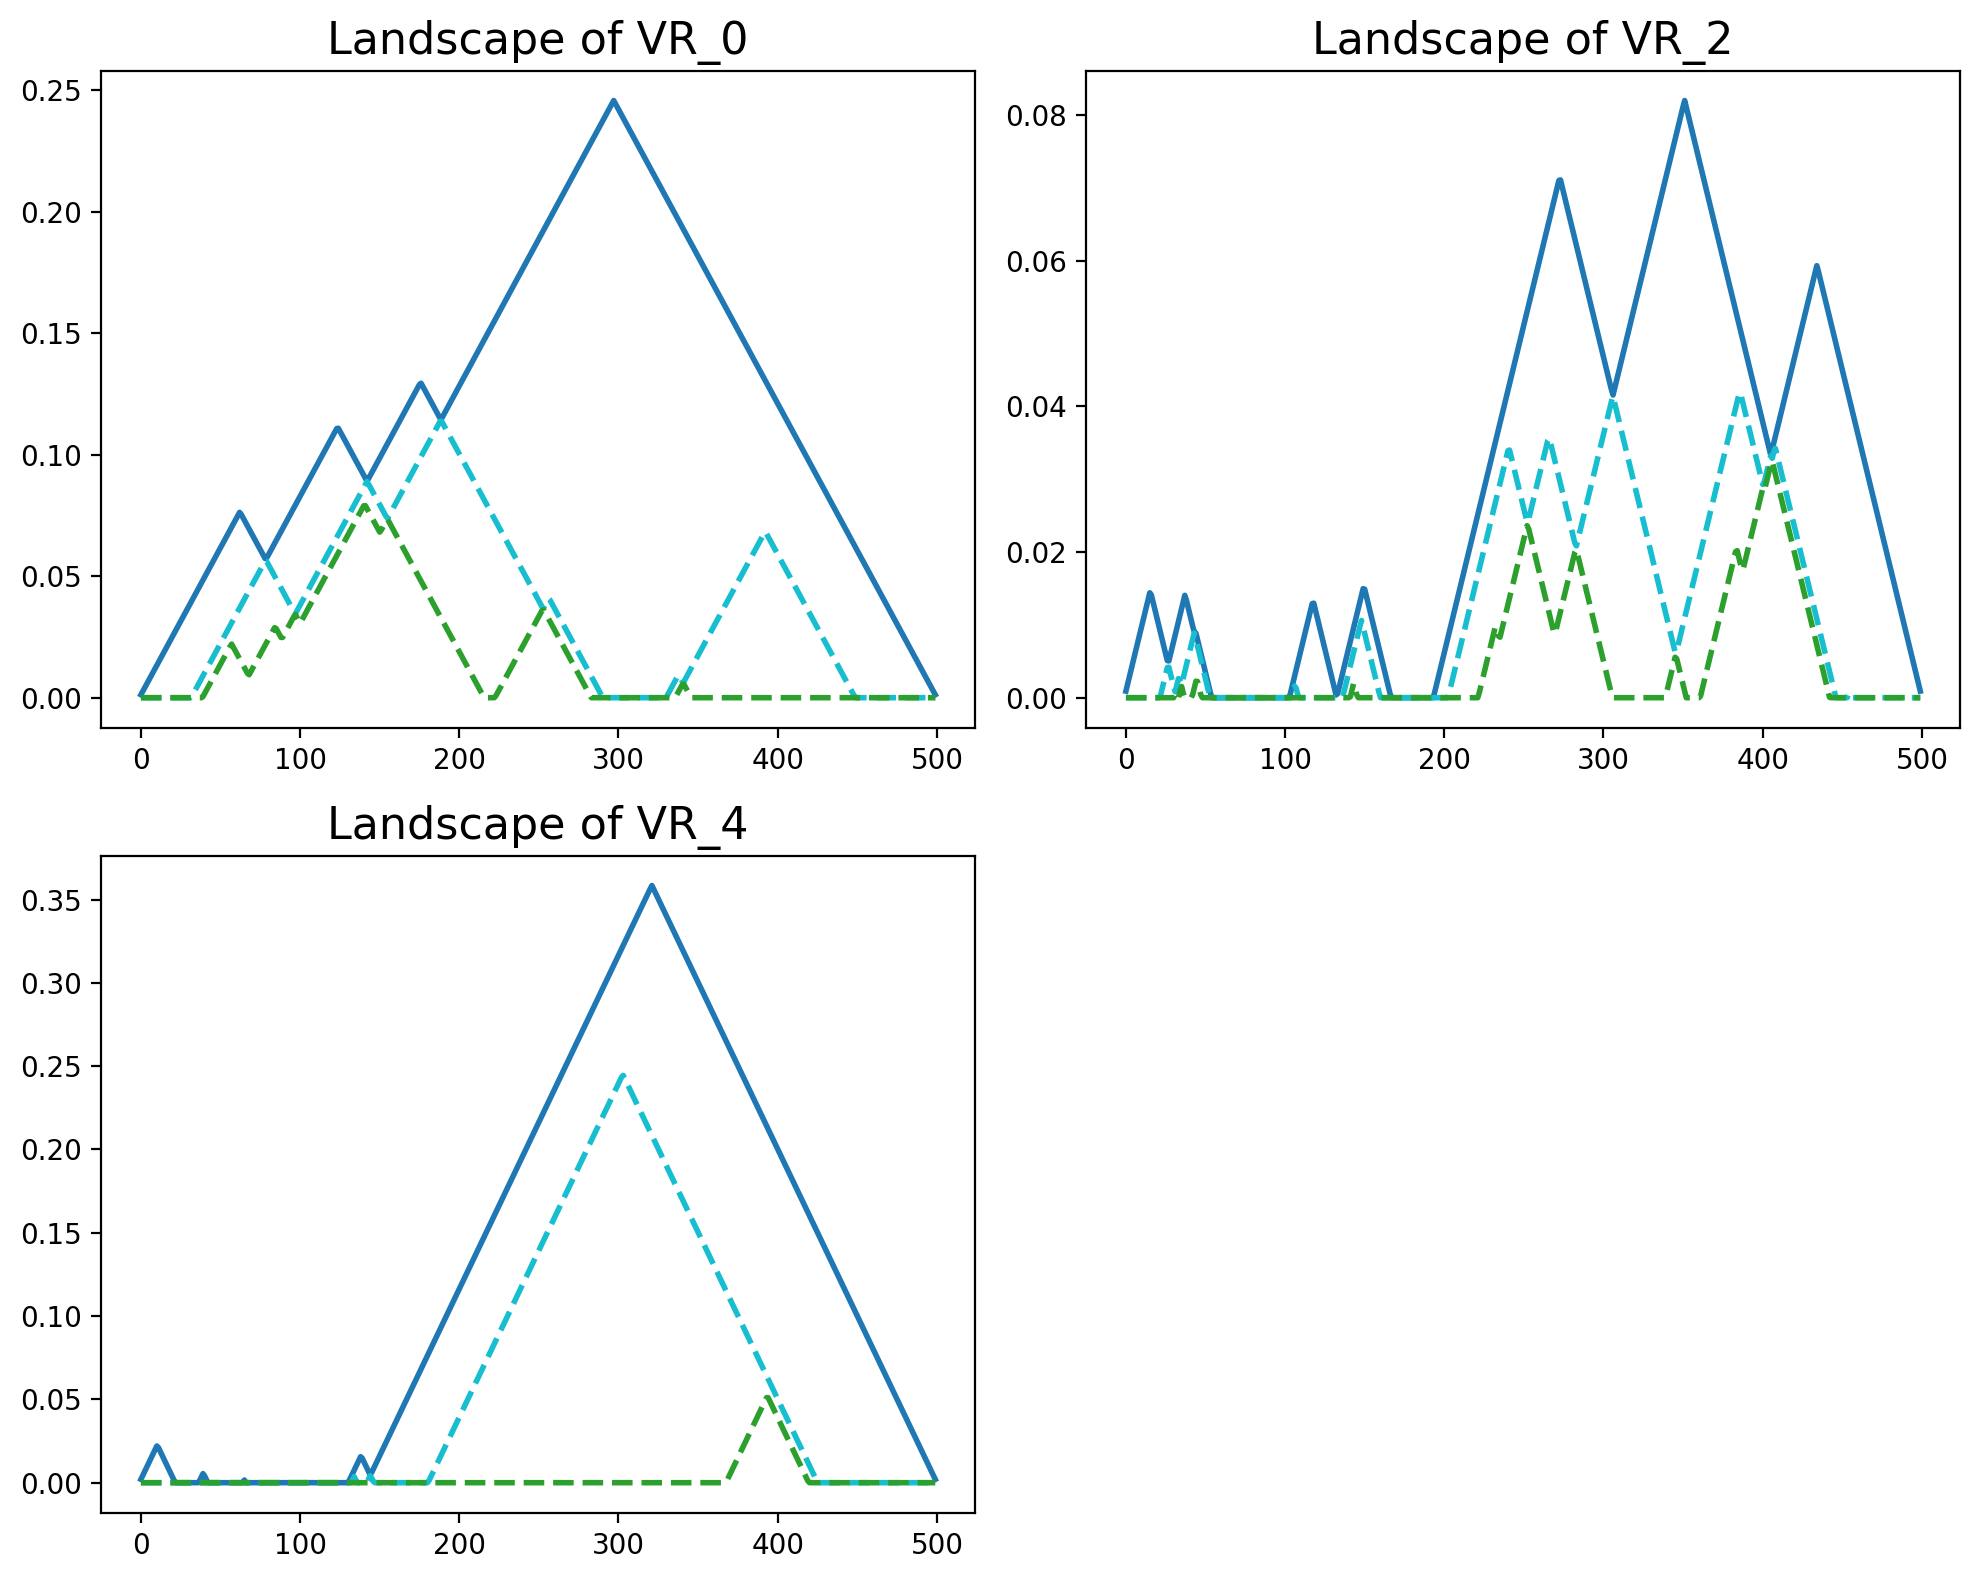

In [39]:
fig, ax = myplt.get_axes(len(landscapes), max_col=2, res=200)
for i,j in enumerate(landscapes):
    ax[i].plot(landscapes[j][0][:RES], c='tab:blue', linewidth=2)
    ax[i].plot(landscapes[j][0][RES:RES*2], c='tab:cyan', linestyle='dashed', linewidth=2)
    ax[i].plot(landscapes[j][0][RES*2:RES*3], c='tab:green', linestyle='dashed', linewidth=2)
    # plt.plot(L[0][3000:4000], c='tab:orange')
    # plt.plot(L[0][4000:5000], c='tab:red')
    ax[i].set_title(r'Landscape of '+VRc[i], size=16)
fig.tight_layout()

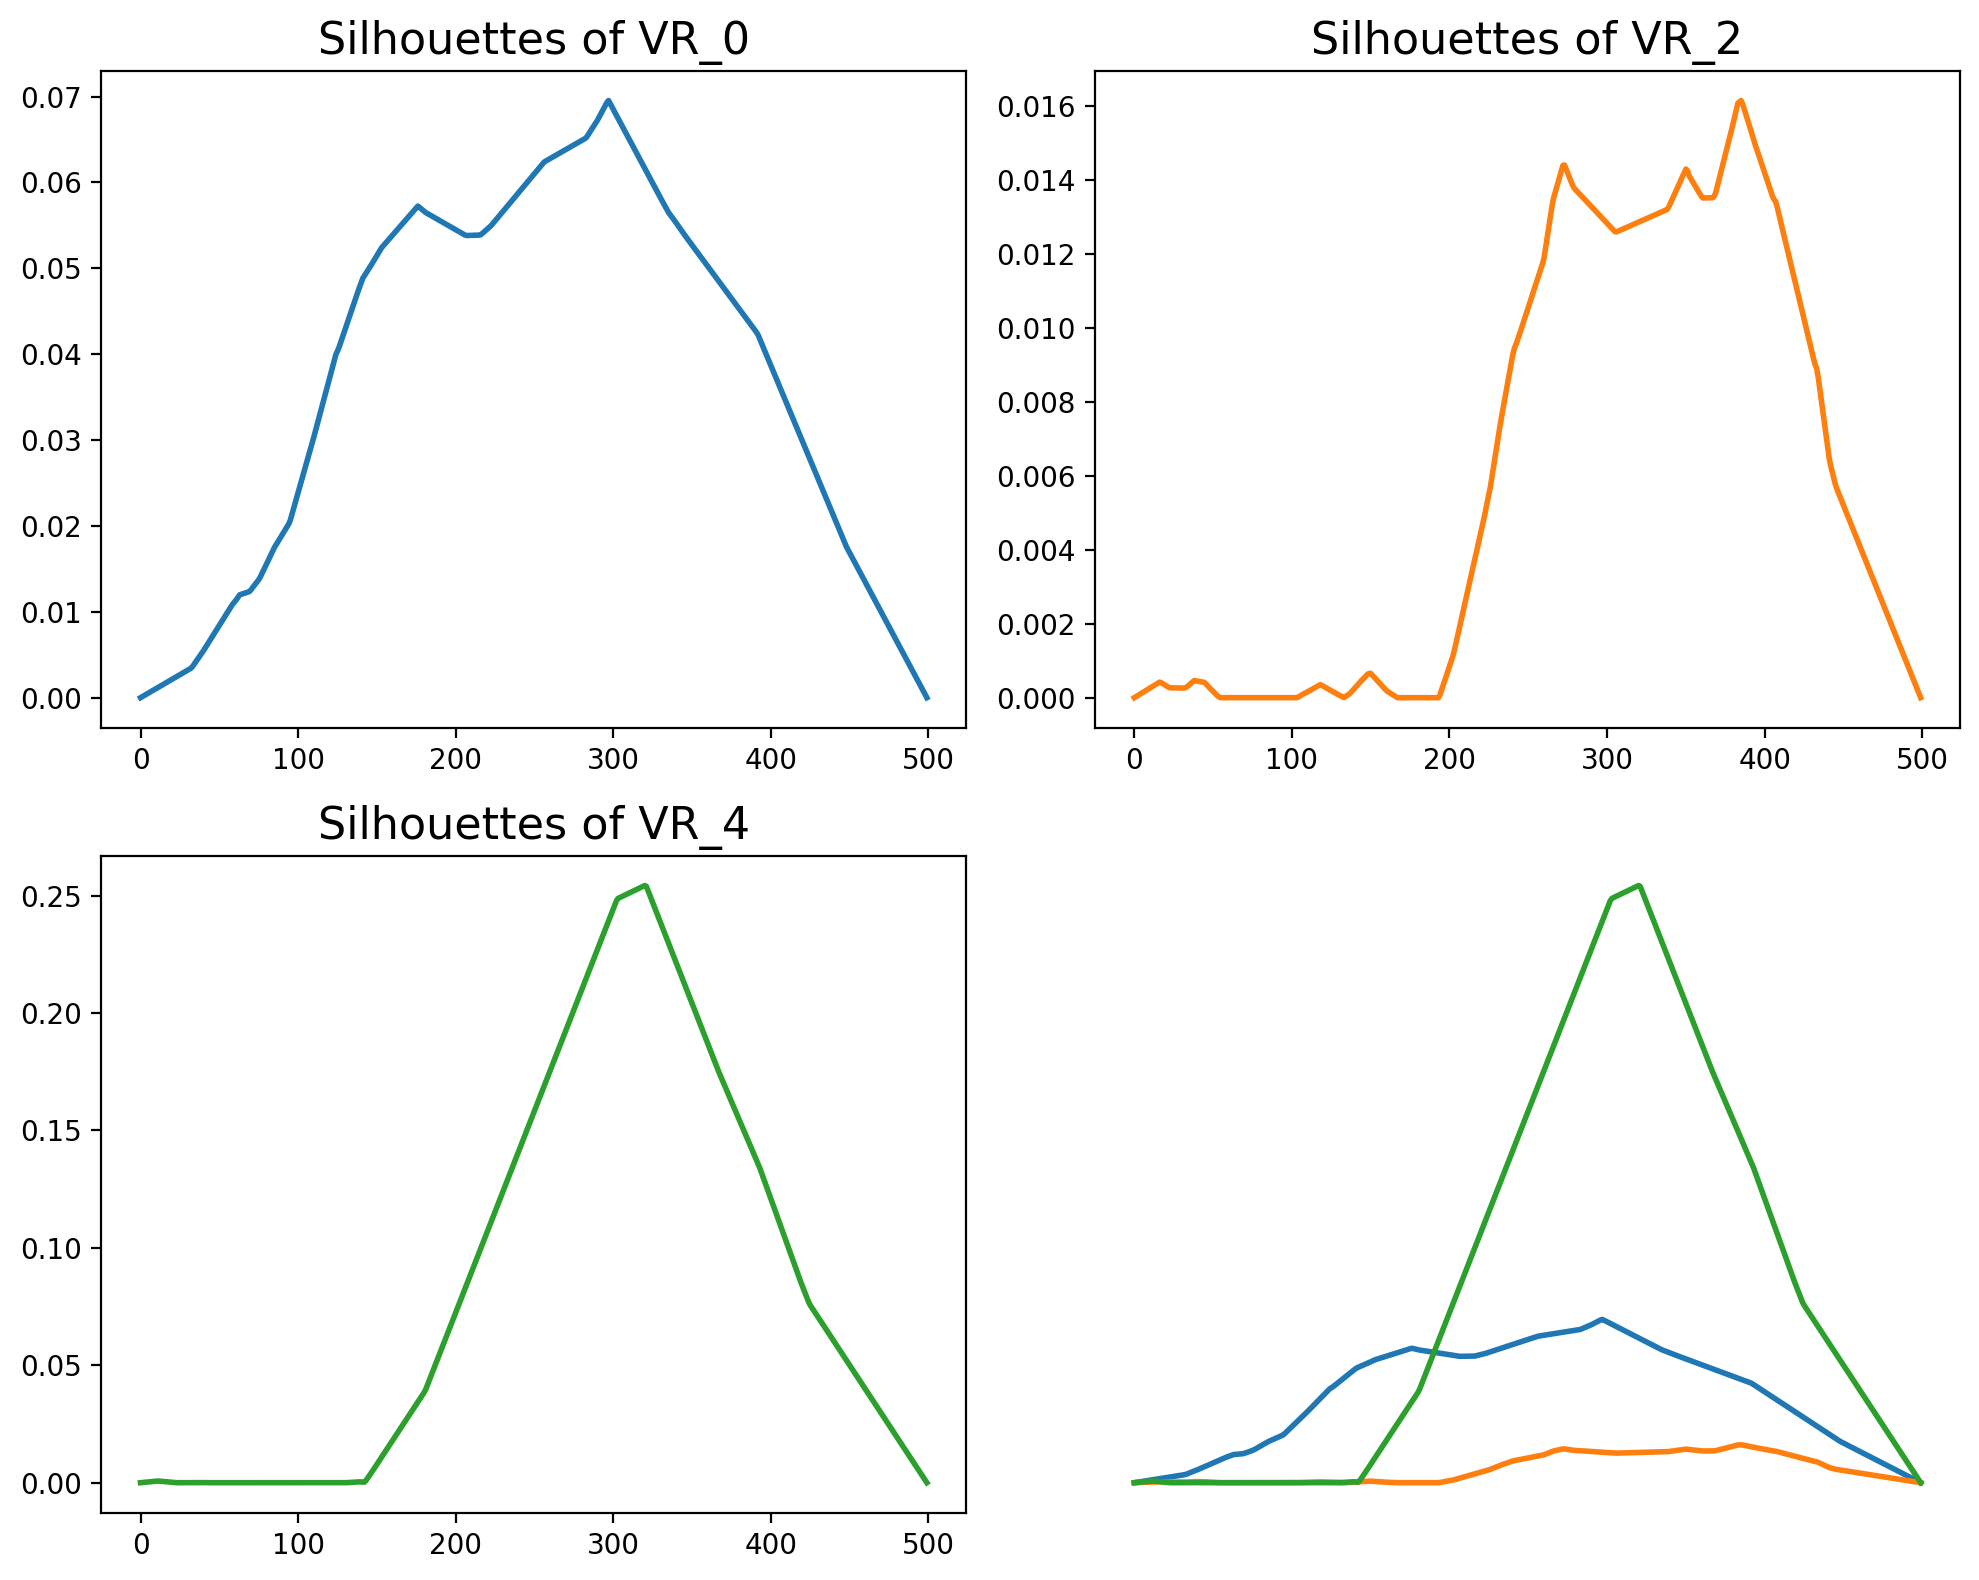

In [46]:
palette = myplt.myPalette(3, palette='tab10')
fig, ax = myplt.get_axes(len(silhouettes), max_col=2, res=200)
for i,j in enumerate(silhouettes):
    ax[i].plot(silhouettes[j][0], linewidth=2, c=palette[i])
    ax[i].set_title(r'Silhouettes of '+VRc[i], size=16)
    ax[3].plot(silhouettes[j][0], linewidth=2, c=palette[i])
fig.tight_layout()